In [5]:
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pymc3 import  *
import theano
import pandas as pd
from statsmodels.formula.api import glm as glm_sm
import statsmodels.api as sm
from pandas.tools.plotting import scatter_matrix
sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.6


## [Document URL](https://docs.pymc.io/notebooks/GLM.html)

In [77]:

size = 50
true_intercept = 1
true_slope = 2
x = np.linspace(0, 1, size)
y = true_intercept + x*true_slope + np.random.normal(scale=.5, size=size)
data = {'x': x, 'y': y}

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, x, Intercept]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:04<00:00, 2110.36draws/s]


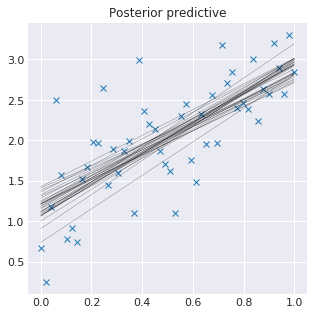

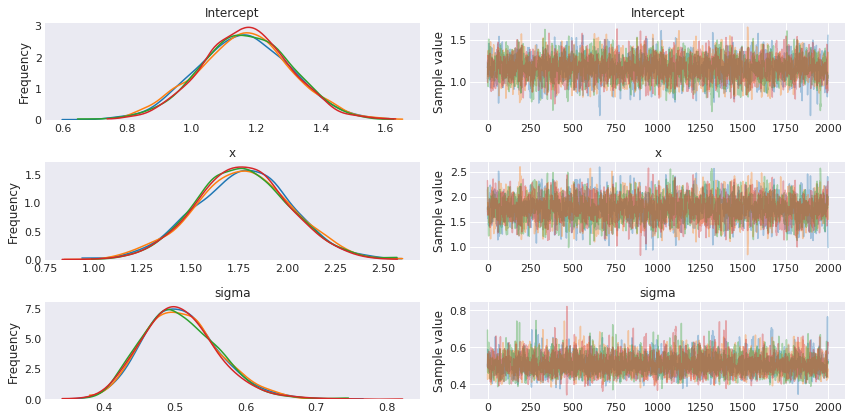

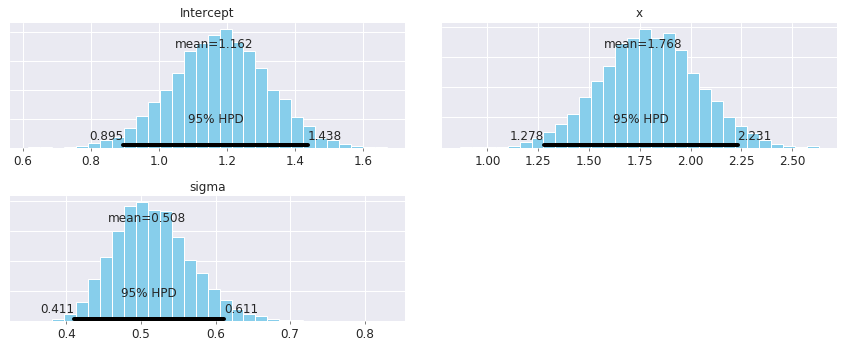

In [78]:
with Model() as model : 
    lm = glm.LinearComponent.from_formula("y~x" , data)
    sigma = Uniform("sigma", 0 , 20)
    y_obs = Normal("y_obs" , mu = lm.y_est , sd = sigma , observed= y)
    trace = sample(2000, cores = 4 )
    
plt.figure(figsize=(5,5))
plt.plot(x, y, "x")
plot_posterior_predictive_glm(trace)


pm.plots.traceplot(trace)
plt.show()

plot_posterior(trace)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:04<00:00, 2030.77draws/s]


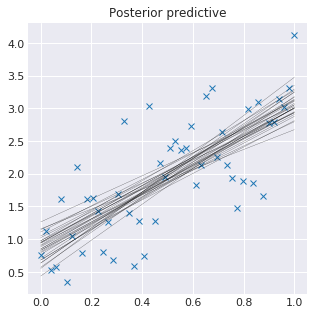

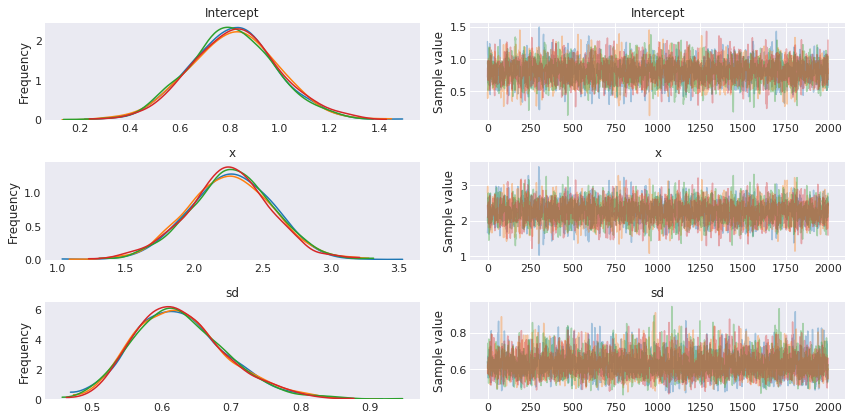

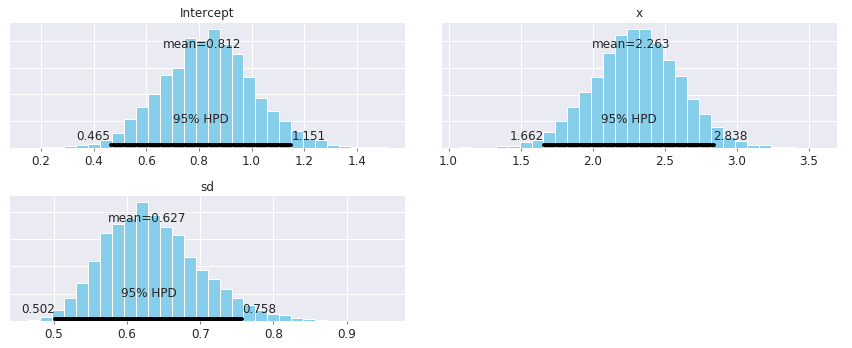

In [74]:
with Model() as model : 
    GLM.from_formula("y~x", data)
    trace = sample(2000, cores = 4)

    
plt.figure( figsize=(5,5))
plt.plot(x,y,"x")
plot_posterior_predictive_glm(trace)

pm.plots.traceplot(trace)
plt.show()

plot_posterior(trace)
plt.show()

Robust GLM

In [70]:
x_out = np.append(x, [ 0.1 , 0.15 , 0.2])
y_out = np.append(y, [8,6,9])
data_outlier = dict(x = x_out , y = y_out)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [sd, x, Intercept]
Sampling 8 chains: 100%|██████████| 20000/20000 [00:07<00:00, 2671.42draws/s]
The acceptance probability does not match the target. It is 0.883652932016001, but should be close to 0.8. Try to increase the number of tuning steps.


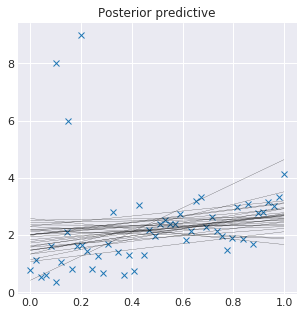

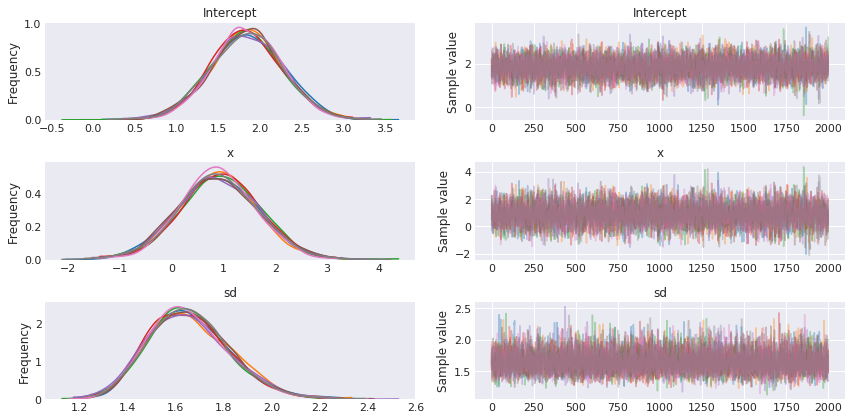

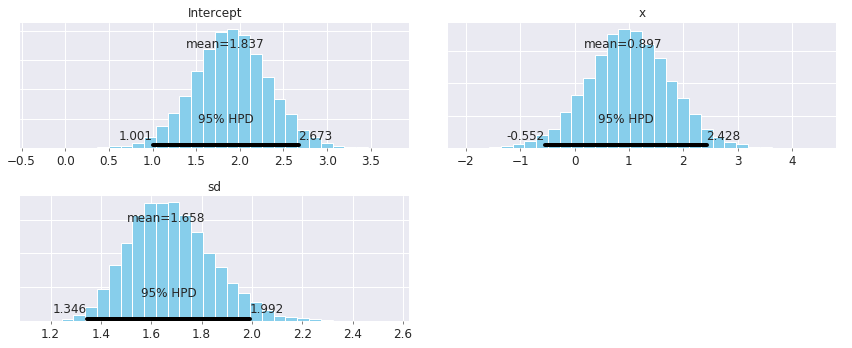

In [75]:
with Model() as model :
    GLM.from_formula("y~x" , data_outlier)
    trace = sample(2000, cores=8)
plt.figure(figsize=(5,5))
plt.plot(data_outlier["x"], data_outlier["y"],"x")
plot_posterior_predictive_glm(trace)

pm.plots.traceplot(trace)
plt.show()

plot_posterior(trace)
plt.show()

* Normal 분포는 꼬리 분포에 확률 값이 작기 떄문에 아웃라이어에 영향을 많이 받는다.
* 그래서 대신에 T-분포(꼬리가 두껍고 아웃라이어에 더 Robust)한 Normal Likelihood 사용한다면?
* `linear_component()` 함수는 T 분포로 정의 되어 있다. 자동으로 GLM에 사용가능하다.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [lam, x, Intercept]
Sampling 8 chains: 100%|██████████| 20000/20000 [00:08<00:00, 2471.11draws/s]


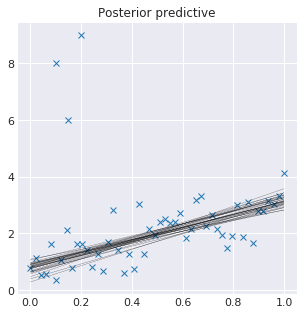

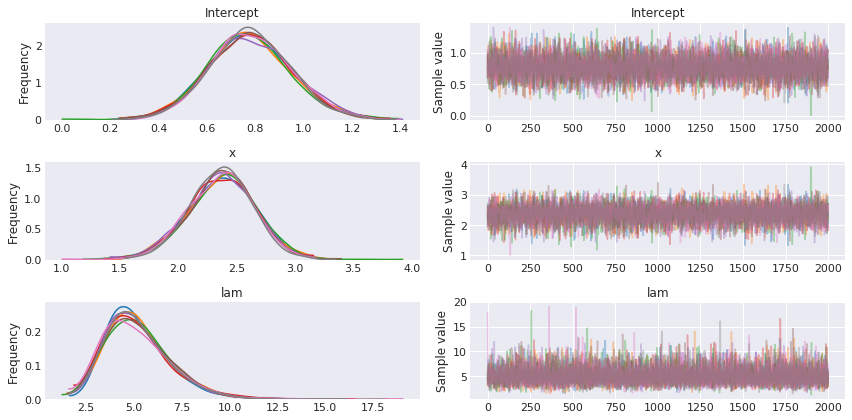

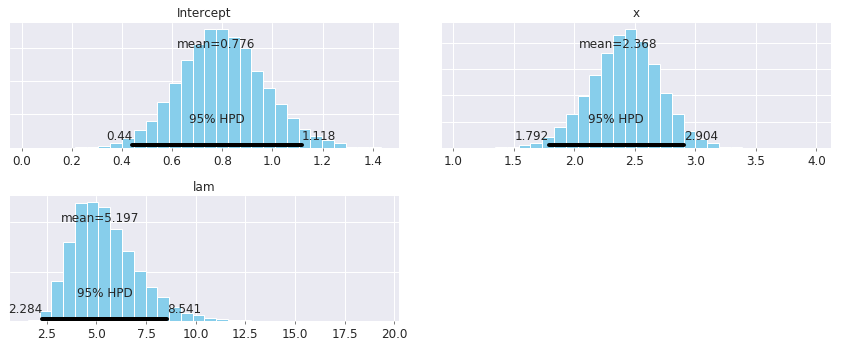

In [76]:
with Model() as model_robust:
    family = glm.families.StudentT(link=glm.families.Identity(),
                                   priors={'nu': 1.5,
                                           'lam': Uniform.dist(0, 20)})
    GLM.from_formula("y~x" , data_outlier , family=family)
    trace = sample(2000, cores = 8)
    
plt.figure(figsize= (5,5))
plt.plot(x_out , y_out , "x")
plot_posterior_predictive_glm(trace)

pm.plots.traceplot(trace)
plt.show()

plot_posterior(trace)
plt.show()

## Hierarchical GLM [해야함]

### * [Continuous 분포](https://docs.pymc.io/api/distributions/continuous.html)
### * [Discrete 분포](https://docs.pymc.io/api/distributions/discrete.html)

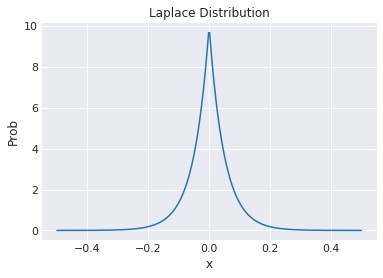

In [29]:
LP =  Laplace.dist( mu =0 , b = 0.05)
x_eval = np.linspace( -.5,.5 , 300)
plt.plot( x_eval , theano.tensor.exp(LP.logp(x_eval)).eval())
plt.xlabel("x")
plt.ylabel("Prob")
plt.title("Laplace Distribution")
plt.show()

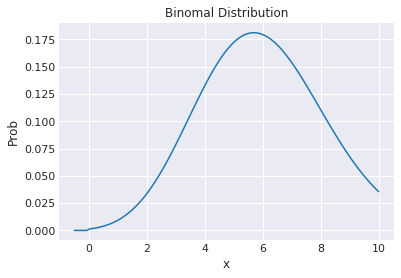

In [53]:
Bp = Binomial.dist(n=30 , p= 0.2)
x_eval = np.linspace( -0.5, 10.0 , 100)
plt.plot( x_eval , theano.tensor.exp(Bp.logp(x_eval)).eval())
plt.xlabel("x")
plt.ylabel("Prob")
plt.title("Binomal Distribution")
plt.show()